In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
distance = False

In [3]:
df = pd.read_csv("/Users/vivekhsridhar/Library/Mobile Documents/com~apple~CloudDocs/Documents/Code/decision_geometry/decision_geometry/output/geometry.csv")
df.head()

,time,x,y
0,10,499.451,499.827
1,20,498.939,499.655
2,30,498.586,499.555
3,40,498.226,499.326
4,50,498.191,499.141


In [4]:
targets = pd.read_csv("/Users/vivekhsridhar/Library/Mobile Documents/com~apple~CloudDocs/Documents/Code/decision_geometry/decision_geometry/output/targets.csv")
targets.head()

,target_id,target_x,target_y
0,0,750,66.9873
1,1,1000,500.0000
2,2,750,933.0130
3,3,250,933.0130
4,4,0,500.0000


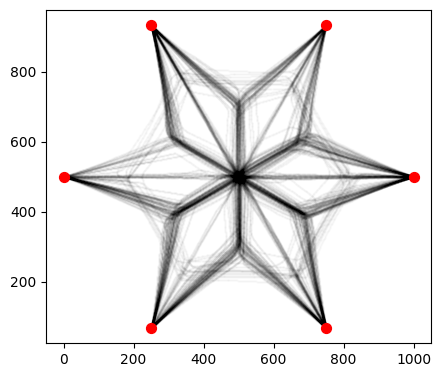

In [5]:
width = 5
height = 5*np.sin(np.pi/3)

fig,ax = plt.subplots(1,1,figsize=(width,height))

if distance:
    ax.scatter(df[' left_right_distance'], df[' y'], c='black', s=1, alpha=0.005)
else:
    ax.scatter(df[' x'], df[' y'], c='black', s=1, alpha=0.01)
    ax.scatter(targets[' target_x'], targets[' target_y'], c='red', s=50)

ax.set_aspect('equal')